# Recommendations with IBM

In this notebook, you will be putting your recommendation skills to use on real data from the IBM Watson Studio platform. 


You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/rubrics/3325/view).  **Please save regularly.**

By following the table of contents, you will build out a number of different methods for making recommendations that can be used for different situations. 


## Table of Contents

I. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
II. [Rank Based Recommendations](#Rank)<br>
III. [User-User Based Collaborative Filtering](#User-User)<br>
IV. [Content Based Recommendations (EXTRA - NOT REQUIRED)](#Content-Recs)<br>
V. [Matrix Factorization](#Matrix-Fact)<br>
VI. [Extras & Concluding](#conclusions)

At the end of the notebook, you will find directions for how to submit your work.  Let's get started by importing the necessary libraries and reading in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_tests as t
import pickle

%matplotlib inline

df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Show df to get an idea of the data
df.head()

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [2]:
df.shape[0]

45993

In [3]:
df_content.shape[0]

1056

In [4]:
# Show df_content to get an idea of the data
df_content.head()

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4


### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

Use the dictionary and cells below to provide some insight into the descriptive statistics of the data.

`1.` What is the distribution of how many articles a user interacts with in the dataset?  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user interacts with an article.  

**a. Exploratory analysis about "number of users interact with an article"**

- Number of times each user interacts with an article

In [5]:
df.groupby(['article_id','email']).size()

article_id  email                                   
0.0         2841916b462a2b89d36f4f95ca2d1f42559a5788    1
            384255292a8223e84f05ca1e1deaa450c993e148    3
            451a9a4a4cb1cc4e5f38d04e8859cc3fb275cc66    1
            74ca1ae8b034f7fad73a54d55fb1f58747f00493    1
            8bd0afc488016810c287ac4ec844895d570b0af4    1
            a60b7e945a8f2114d5dfbdd53182ad1d526534e2    1
            ad06c765d31179e56f309438367ecb30e1059620    1
            ca7d48adf2c7394ed5a8776de959fa8047e43d4b    1
            db8ac9b2f552db35750239ada8bfcb59b3ae48c0    1
            df722d3aac72766b93d4a65d8b4ac084a968d684    1
            e667c9a1cd56368dfa2f4b974ab2d848585552d7    1
            e6ed9e15addba353fe3c1f36d865a63fa254b9cc    1
2.0         0246d11c827f90850ce7062e9554c9d5eeb30027    1
            0286bfe26356436658cf4b29b232f0700f0bb9ce    2
            12815feeacc6f27dff5b3441a54418d2d51001ef    1
            12bb8a9740400ced27ae5a7d4c990ac3b7e3c77d    1
            15a1660

- Number of users interact with an article

In [6]:
article_interact_unique = df.groupby(['article_id'])['email'].nunique()
article_interact_unique

article_id
0.0        12
2.0        44
4.0        13
8.0        82
9.0        10
12.0       99
14.0       89
15.0       26
16.0       56
18.0       68
20.0      186
25.0       15
26.0       80
28.0       39
29.0       41
30.0       17
32.0       60
33.0      109
34.0       86
36.0       18
39.0       59
40.0       64
43.0      299
48.0       11
50.0       69
51.0      107
53.0       93
54.0       20
57.0      128
58.0       11
         ... 
1412.0     19
1414.0      4
1415.0     10
1416.0     73
1418.0     41
1419.0      6
1420.0     94
1421.0      3
1422.0    105
1423.0    102
1424.0    115
1425.0     57
1426.0     96
1427.0    308
1428.0     91
1429.0    397
1430.0    237
1431.0    320
1432.0    232
1433.0     86
1434.0     36
1435.0     75
1436.0    282
1437.0    127
1439.0     43
1440.0      8
1441.0      6
1442.0      4
1443.0     12
1444.0      5
Name: email, Length: 714, dtype: int64

- The distribution of "how many user interact with an article"

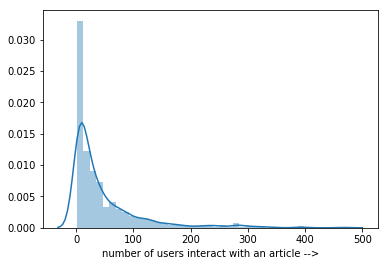

In [7]:
x2 = pd.Series(article_interact_unique, name="number of users interact with an article -->")
sns.distplot(x2)

**b. Exploratory analysis about "number of articles a user interacts with"**

- Number of times a user interacts with articles

In [8]:
df.groupby(['email','article_id']).size()

email                                     article_id
0000b6387a0366322d7fbfc6434af145adf7fed1  43.0          2
                                          124.0         1
                                          173.0         1
                                          288.0         1
                                          349.0         1
                                          618.0         1
                                          732.0         1
                                          1162.0        1
                                          1232.0        1
                                          1314.0        1
                                          1337.0        1
                                          1354.0        1
001055fc0bb67f71e8fa17002342b256a30254cd  124.0         1
                                          254.0         1
                                          390.0         1
                                          1386.0        1
00148e4911c7e04eeff

- Number of articles a user interacts with.

In [9]:
user_interact_unique = df.groupby(['email'])['article_id'].nunique()
user_interact_unique

email
0000b6387a0366322d7fbfc6434af145adf7fed1    12
001055fc0bb67f71e8fa17002342b256a30254cd     4
00148e4911c7e04eeff8def7bbbdaf1c59c2c621     3
001a852ecbd6cc12ab77a785efa137b2646505fe     5
001fc95b90da5c3cb12c501d201a915e4f093290     2
0042719415c4fca7d30bd2d4e9d17c5fc570de13     2
00772abe2d0b269b2336fc27f0f4d7cb1d2b65d7     2
008ba1d5b4ebf54babf516a2d5aa43e184865da5    10
008ca24b82c41d513b3799d09ae276d37f92ce72     1
008dfc7a327b5186244caec48e0ab61610a0c660    10
009af4e0537378bf8e8caf0ad0e2994f954d822e     1
00bda305223d05f6df5d77de41abd2a0c7d895fe     4
00c2d5190e8c6b821b0e3848bf56f6e47e428994     3
00ced21f957bbcee5edf7b107b2bd05628b04774     4
00d9337ecd5f70fba1c4c7a78e21b3532e0112c4     1
00e524e4f13137a6fac54f9c71d7769c6507ecde     8
00f8341cbecd6af00ba8c78b3bb6ec49adf83248     2
00f946b14100f0605fa25089437ee9486378872c     1
01041260c97ab9221d923b0a2c525437f148d589     2
0108ce3220657a9a89a85bdec959b0f2976dd51c     3
011455e91a24c1fb815a4deac6b6eaf5ad16819e     9
01198c5

- Visualize the distribution of how many articles a user interacts with

In [10]:
user_interact_unique.max()

135

(array([  3.48900000e+03,   7.84000000e+02,   3.38000000e+02,
          1.92000000e+02,   1.02000000e+02,   8.10000000e+01,
          3.30000000e+01,   4.00000000e+01,   2.30000000e+01,
          1.20000000e+01,   1.30000000e+01,   1.50000000e+01,
          4.00000000e+00,   4.00000000e+00,   1.00000000e+01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   5.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00]),
 array([   1.        ,    5.96296296,   10.92592593,   15.88888889,
          20.85185185,   25.81481481,   30.77777778,   35.74074074,
          40.7037037 ,   45.66666667,   50.62962963,   55.59259259,
          60.55555556,   65.51851852,   70.48148148,   75.44444444,
          80.40740741,   85.37037037,   90.33333333,   95.2962963 ,
         100.25925926,  105.22222222,  110.18518519,  115.14814815,
         120.11111111,  125.0740

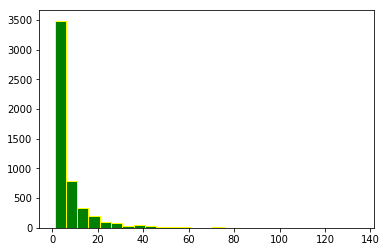

In [11]:
# data visualization
plt.hist(user_interact_unique, bins = 27, ec="yellow", fc="green") #bins =27 for bin_size = 135/27 = 5        

using Seaborn for seeing better distribution

In [12]:
sns.__version__ # don't support histplot, only can support distplot

'0.8.1'

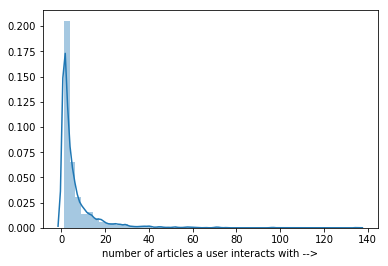

In [13]:
x1 = pd.Series(user_interact_unique, name="number of articles a user interacts with -->")
sns.distplot(x1)

- Cumulative distribution statistics of "how many articles a user interacts with" (use Mathplotlib because seaborn ver 0.8.1 doesnot support histplot)

(array([ 2309.,  2833.,  3489.,  3735.,  3912.,  4159.,  4273.,  4353.,
         4495.,  4564.,  4611.,  4693.,  4738.,  4776.,  4822.,  4844.,
         4861.,  4905.,  4920.,  4940.,  4971.,  4986.,  4993.,  5008.,
         5013.,  5019.,  5034.,  5043.,  5049.,  5067.,  5069.,  5071.,
         5082.,  5087.,  5088.,  5093.,  5094.,  5096.,  5104.,  5106.,
         5107.,  5112.,  5118.,  5120.,  5124.,  5125.,  5126.,  5126.,
         5128.,  5128.,  5128.,  5130.,  5138.,  5138.,  5138.,  5140.,
         5140.,  5140.,  5140.,  5140.,  5140.,  5140.,  5140.,  5140.,
         5140.,  5140.,  5140.,  5140.,  5140.,  5140.,  5142.,  5144.,
         5144.,  5145.,  5146.,  5146.,  5146.,  5146.,  5146.,  5146.,
         5146.,  5146.,  5146.,  5146.,  5146.,  5146.,  5146.,  5146.,
         5146.,  5146.,  5146.,  5146.,  5146.,  5146.,  5146.,  5146.,
         5146.,  5146.,  5146.,  5148.]),
 array([   1.  ,    2.34,    3.68,    5.02,    6.36,    7.7 ,    9.04,
          10.38,   11.7

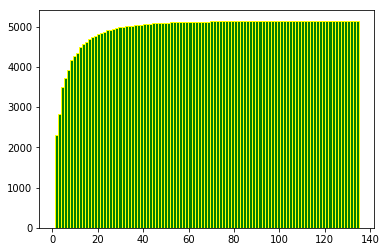

In [14]:
plt.hist(user_interact_unique, bins = 100, ec="yellow", fc="green", cumulative = True)  

- Calculate the descriptive parameters: the median value of "how many articles a user interacts with" distribution

In [15]:
median_val = np.median(user_interact_unique)
median_val

3.0

- Calculate the descriptive parameters: the max value of "how many articles a user interacts with"

In [16]:
df.groupby(['email']).size().max()

364

- Fill in the descriptive parameters

In [17]:
# Fill in the median and maximum number of user_article interactios below

median_val = 3.0 # 50% of individuals interact with 3.0 number of articles or fewer.
max_views_by_user = 364 # The maximum number of user-article interactions by any 1 user is 135.

`2.` Explore and remove duplicate articles from the **df_content** dataframe.  

In [18]:
# Check the number of items in df_content (articles)
df_content.shape[0]

1056

In [19]:
# Find and explore duplicate articles
df_content[df_content.duplicated(subset=['article_id'], keep='first') == True]

,doc_body,doc_description,doc_full_name,doc_status,article_id
365,Follow Sign in / Sign up Home About Insight Da...,During the seven-week Insight Data Engineering...,Graph-based machine learning,Live,50
692,Homepage Follow Sign in / Sign up Homepage * H...,One of the earliest documented catalogs was co...,How smart catalogs can turn the big data flood...,Live,221
761,Homepage Follow Sign in Get started Homepage *...,Today’s world of data science leverages data f...,Using Apache Spark as a parallel processing fr...,Live,398
970,This video shows you how to construct queries ...,This video shows you how to construct queries ...,Use the Primary Index,Live,577
971,Homepage Follow Sign in Get started * Home\r\n...,"If you are like most data scientists, you are ...",Self-service data preparation with IBM Data Re...,Live,232


In [20]:
# Remove any rows that have the same article_id - only keep the first
df_content_drop = df_content.drop_duplicates(subset=['article_id'], keep='first') #drop 5 rows as above

In [21]:
df_content_drop.shape[0] #check the number of articles after drop the duplicated rows

1051

`3.` Use the cells below to find:

**a.** The number of unique articles that have an interaction with a user.  
**b.** The number of unique articles in the dataset (whether they have any interactions or not).<br>
**c.** The number of unique users in the dataset. (excluding null values) <br>
**d.** The number of user-article interactions in the dataset.

In [22]:
# The number of unique articles that have at least one interaction
article_interact_unique.shape[0] 

714

In [23]:
# The number of unique articles on the IBM platform
df_content_drop.shape[0]

1051

In [24]:
# The number of unique users
user_interact_unique.shape[0]

5148

In [25]:
# The number of user-article interactions
df.shape[0]

45993

In [26]:
unique_articles = article_interact_unique.shape[0] # The number of unique articles that have at least one interaction
total_articles = df_content_drop.shape[0] # The number of unique articles on the IBM platform
unique_users = user_interact_unique.shape[0] # The number of unique users
user_article_interactions = df.shape[0] # The number of user-article interactions

`4.` Use the cells below to find the most viewed **article_id**, as well as how often it was viewed.  After talking to the company leaders, the `email_mapper` function was deemed a reasonable way to map users to ids.  There were a small number of null values, and it was found that all of these null values likely belonged to a single user (which is how they are stored using the function below).

In [27]:
# The most viewed article in the dataset was viewed how many times?
df.groupby(['article_id']).size().max()

937

In [28]:
article_interactions = df.groupby(['article_id']).size()
article_interactions

article_id
0.0        14
2.0        58
4.0        13
8.0        85
9.0        10
12.0      157
14.0       89
15.0       26
16.0       61
18.0       78
20.0      249
25.0       15
26.0       89
28.0       42
29.0       75
30.0       17
32.0       64
33.0      141
34.0       93
36.0       18
39.0       68
40.0       70
43.0      460
48.0       11
50.0       89
51.0      124
53.0      115
54.0       20
57.0      140
58.0       11
         ... 
1412.0     25
1414.0      4
1415.0     11
1416.0    102
1418.0     43
1419.0      6
1420.0    113
1421.0      3
1422.0    163
1423.0    155
1424.0    131
1425.0     71
1426.0    138
1427.0    643
1428.0    120
1429.0    937
1430.0    336
1431.0    671
1432.0    340
1433.0    108
1434.0     42
1435.0    120
1436.0    481
1437.0    218
1439.0     59
1440.0     10
1441.0      8
1442.0      4
1443.0     22
1444.0      5
Length: 714, dtype: int64

In [29]:
article_interactions[article_interactions == article_interactions.max()]

article_id
1429.0    937
dtype: int64

In [30]:
most_viewed_article_id = '1429.0' # The most viewed article in the dataset as a string with one value following the decimal 
max_views = 937 # The most viewed article in the dataset was viewed how many times?

In [31]:
## No need to change the code here - this will be helpful for later parts of the notebook
# Run this cell to map the user email to a user_id column and remove the email column

def email_mapper():
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# show header
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [32]:
## If you stored all your results in the variable names above, 
## you shouldn't need to change anything in this cell

sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': most_viewed_article_id,
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}

# Test your dictionary against the solution
t.sol_1_test(sol_1_dict)

It looks like you have everything right here! Nice job!


### <a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a>

Unlike in the earlier lessons, we don't actually have ratings for whether a user liked an article or not.  We only know that a user has interacted with an article.  In these cases, the popularity of an article can really only be based on how often an article was interacted with.

`1.` Fill in the function below to return the **n** top articles ordered with most interactions as the top. Test your function using the tests below.

- Draft the functions with n = 10

In [33]:
df.groupby(['article_id']).size()

article_id
0.0        14
2.0        58
4.0        13
8.0        85
9.0        10
12.0      157
14.0       89
15.0       26
16.0       61
18.0       78
20.0      249
25.0       15
26.0       89
28.0       42
29.0       75
30.0       17
32.0       64
33.0      141
34.0       93
36.0       18
39.0       68
40.0       70
43.0      460
48.0       11
50.0       89
51.0      124
53.0      115
54.0       20
57.0      140
58.0       11
         ... 
1412.0     25
1414.0      4
1415.0     11
1416.0    102
1418.0     43
1419.0      6
1420.0    113
1421.0      3
1422.0    163
1423.0    155
1424.0    131
1425.0     71
1426.0    138
1427.0    643
1428.0    120
1429.0    937
1430.0    336
1431.0    671
1432.0    340
1433.0    108
1434.0     42
1435.0    120
1436.0    481
1437.0    218
1439.0     59
1440.0     10
1441.0      8
1442.0      4
1443.0     22
1444.0      5
Length: 714, dtype: int64

In [34]:
article_interactions_nlargest = df.groupby(['article_id']).size().nlargest(10)
article_interactions_nlargest

article_id
1429.0    937
1330.0    927
1431.0    671
1427.0    643
1364.0    627
1314.0    614
1293.0    572
1170.0    565
1162.0    512
1304.0    483
dtype: int64

In [35]:
article_interactions_nlargest.index

Float64Index([1429.0, 1330.0, 1431.0, 1427.0, 1364.0, 1314.0, 1293.0, 1170.0,
              1162.0, 1304.0],
             dtype='float64', name='article_id')

In [36]:
article_interactions_nlargest.index.map(str)

Index(['1429.0', '1330.0', '1431.0', '1427.0', '1364.0', '1314.0', '1293.0',
       '1170.0', '1162.0', '1304.0'],
      dtype='object', name='article_id')

In [37]:
article_interactions_nlargest.index.map(str).tolist()

['1429.0',
 '1330.0',
 '1431.0',
 '1427.0',
 '1364.0',
 '1314.0',
 '1293.0',
 '1170.0',
 '1162.0',
 '1304.0']

In [43]:
top_articles_index = article_interactions_nlargest.index.tolist()
top_articles_index

[1429.0,
 1330.0,
 1431.0,
 1427.0,
 1364.0,
 1314.0,
 1293.0,
 1170.0,
 1162.0,
 1304.0]

In [44]:
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [45]:
df_drop = df[['article_id','title']]
df_drop.head()

,article_id,title
0,1430.0,"using pixiedust for fast, flexible, and easier..."
1,1314.0,healthcare python streaming application demo
2,1429.0,use deep learning for image classification
3,1338.0,ml optimization using cognitive assistant
4,1276.0,deploy your python model as a restful api


In [46]:
df_drop = df_drop.drop_duplicates(subset=['article_id'], keep='first')
df_drop.head()

,article_id,title
0,1430.0,"using pixiedust for fast, flexible, and easier..."
1,1314.0,healthcare python streaming application demo
2,1429.0,use deep learning for image classification
3,1338.0,ml optimization using cognitive assistant
4,1276.0,deploy your python model as a restful api


In [47]:
df_drop.shape[0]

714

In [48]:
df_drop[df_drop['article_id'].isin(top_articles_index)]

,article_id,title
1,1314.0,healthcare python streaming application demo
2,1429.0,use deep learning for image classification
14,1170.0,"apache spark lab, part 1: basic concepts"
29,1364.0,predicting churn with the spss random tree alg...
31,1162.0,analyze energy consumption in buildings
37,1431.0,visualize car data with brunel
42,1427.0,"use xgboost, scikit-learn & ibm watson machine..."
56,1304.0,gosales transactions for logistic regression m...
66,1330.0,insights from new york car accident reports
154,1293.0,finding optimal locations of new store using d...


In [49]:
top_articles_id = df.groupby(['article_id']).size().nlargest(10).index.map(str).tolist()
top_articles_id

['1429.0',
 '1330.0',
 '1431.0',
 '1427.0',
 '1364.0',
 '1314.0',
 '1293.0',
 '1170.0',
 '1162.0',
 '1304.0']

- Fill in the functions

In [50]:
def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    # Your code here
    article_interactions_nlargest = df.groupby(['article_id']).size().nlargest(n)
    top_articles_index = article_interactions_nlargest.index.tolist()
    df_drop = df[['article_id','title']]
    df_drop = df_drop.drop_duplicates(subset=['article_id'], keep='first')
    top_articles = df_drop[df_drop['article_id'].isin(top_articles_index)]['title']
    
    return top_articles # Return the top article titles from df (not df_content)

def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    # Your code here
    top_articles = df.groupby(['article_id']).size().nlargest(n).index.map(str).tolist()
 
    return top_articles # Return the top article ids

In [51]:
print(get_top_articles(10))
print(get_top_article_ids(10))

1           healthcare python streaming application demo
2             use deep learning for image classification
14              apache spark lab, part 1: basic concepts
29     predicting churn with the spss random tree alg...
31               analyze energy consumption in buildings
37                        visualize car data with brunel
42     use xgboost, scikit-learn & ibm watson machine...
56     gosales transactions for logistic regression m...
66           insights from new york car accident reports
154    finding optimal locations of new store using d...
Name: title, dtype: object
['1429.0', '1330.0', '1431.0', '1427.0', '1364.0', '1314.0', '1293.0', '1170.0', '1162.0', '1304.0']


In [52]:
# Test your function by returning the top 5, 10, and 20 articles
top_5 = get_top_articles(5)
top_10 = get_top_articles(10)
top_20 = get_top_articles(20)

# Test each of your three lists from above
t.sol_2_test(get_top_articles)

Your top_5 looks like the solution list! Nice job.
Your top_10 looks like the solution list! Nice job.
Your top_20 looks like the solution list! Nice job.


### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


`1.` Use the function below to reformat the **df** dataframe to be shaped with users as the rows and articles as the columns.  

* Each **user** should only appear in each **row** once.


* Each **article** should only show up in one **column**.  


* **If a user has interacted with an article, then place a 1 where the user-row meets for that article-column**.  It does not matter how many times a user has interacted with the article, all entries where a user has interacted with an article should be a 1.  


* **If a user has not interacted with an item, then place a zero where the user-row meets for that article-column**. 

Use the tests to make sure the basic structure of your matrix matches what is expected by the solution.

`a.` Draft the function

In [53]:
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [54]:
df['article_id'].shape[0]

45993

In [55]:
df_article_col = df.drop_duplicates(subset=['article_id'], keep='first')['article_id']
df_article_col.head()

0    1430.0
1    1314.0
2    1429.0
3    1338.0
4    1276.0
Name: article_id, dtype: float64

In [56]:
df_article_col.shape[0]

714

In [57]:
df_user_row = df.drop_duplicates(subset=['user_id'], keep='first')['user_id']
df_user_row.head()

0    1
1    2
2    3
3    4
4    5
Name: user_id, dtype: int64

In [58]:
df_user_row.shape[0]

5149

In [59]:
interactions = df.groupby(['user_id','article_id']).size()
interactions.head()

user_id  article_id
1        43.0          1
         109.0         1
         151.0         1
         268.0         1
         310.0         2
dtype: int64

In [60]:
df_interactions = df.groupby(['user_id','article_id']).size().index.to_frame()
df_interactions.head()

user_id  article_id
user_id article_id                     
1       43.0              1        43.0
        109.0             1       109.0
        151.0             1       151.0
        268.0             1       268.0
        310.0             1       310.0

In [61]:
df_interactions['interaction'] = interactions
df_interactions

user_id  article_id  interaction
user_id article_id                                  
1       43.0              1        43.0            1
        109.0             1       109.0            1
        151.0             1       151.0            1
        268.0             1       268.0            1
        310.0             1       310.0            2
        329.0             1       329.0            1
        346.0             1       346.0            1
        390.0             1       390.0            1
        494.0             1       494.0            1
        525.0             1       525.0            1
        585.0             1       585.0            2
        626.0             1       626.0            1
        668.0             1       668.0            2
        732.0             1       732.0            1
        768.0             1       768.0            1
        910.0             1       910.0            1
        968.0             1       968.0            1
        981.0             1       981.0            1
        1052.0            1      1052.0            2
        1170.0            1      1170.0            2
        1183.0            1      1183.0            2
        1185.0            1      1185.0            2
        1232.0            1      1232.0            1
        1293.0            1      1293.0            1
        1305.0            1      1305.0            1
        1363.0            1      1363.0            2
        1368.0            1      1368.0            1
        1391.0            1      1391.0            1
        1400.0            1      1400.0            1
        1406.0            1      1406.0            2
...                     ...         ...          ...
5143    485.0          5143       485.0            1
        495.0          5143       495.0            1
        588.0          5143       588.0            2
        1324.0         5143      1324.0            1
        1330.0         5143      1330.0            2
        1343.0         5143      1343.0            1
        1354.0         5143      1354.0            1
        1360.0         5143      1360.0            1
        1398.0         5143      1398.0            3
        1400.0         5143      1400.0            3
        1409.0         5143      1409.0            1
        1430.0         5143      1430.0            2
        1431.0         5143      1431.0            1
        1436.0         5143      1436.0            1
5144    270.0          5144       270.0            1
5145    20.0           5145        20.0            1
        138.0          5145       138.0            1
        962.0          5145       962.0            2
        1165.0         5145      1165.0            1
        1305.0         5145      1305.0            1
5146    142.0          5146       142.0            1
        1125.0         5146      1125.0            1
        1157.0         5146      1157.0            1
        1282.0         5146      1282.0            1
        1324.0         5146      1324.0            3
        1394.0         5146      1394.0            1
        1416.0         5146      1416.0            1
5147    233.0          5147       233.0            1
5148    1160.0         5148      1160.0            1
5149    16.0           5149        16.0            1

[33682 rows x 3 columns]

In [62]:
user_article_matrix = df_interactions.pivot(*df_interactions.columns).fillna(0)
user_article_matrix

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
user_article_matrix [user_article_matrix > 1] = 1
user_article_matrix

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`b.` Fill in the function

In [64]:
# create the user-article matrix with 1's and 0's

def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    # Fill in the function here
    interactions = df.groupby(['user_id','article_id']).size()
    df_interactions = df.groupby(['user_id','article_id']).size().index.to_frame()
    df_interactions['interaction'] = interactions
    user_item = df_interactions.pivot(*df_interactions.columns).fillna(0)
    user_item [user_item > 1] = 1
    
    return user_item # return the user_item matrix 

user_item = create_user_item_matrix(df)

`c.` Test the function

In [65]:
## Tests: You should just need to run this cell.  Don't change the code.
assert user_item.shape[0] == 5149, "Oops!  The number of users in the user-article matrix doesn't look right."
assert user_item.shape[1] == 714, "Oops!  The number of articles in the user-article matrix doesn't look right."
assert user_item.sum(axis=1)[1] == 36, "Oops!  The number of articles seen by user 1 doesn't look right."
print("You have passed our quick tests!  Please proceed!")

You have passed our quick tests!  Please proceed!


`2.` Complete the function below which should take a user_id and provide an ordered list of the most similar users to that user (from most similar to least similar).  The returned result should not contain the provided user_id, as we know that each user is similar to him/herself. Because the results for each user here are binary, it (perhaps) makes sense to compute similarity as the dot product of two users. 

Use the tests to test your function.

`a.` Draft the function

Computes the similarity of every pair of users based on the dot product

In [66]:
# check the user_item matrix and its dimensions
user_item

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# need to transpose to match the matrix dimension when calculate the dot product
user_item.transpose()

user_id,1,2,3,4,5,6,7,8,9,10,...,5140,5141,5142,5143,5144,5145,5146,5147,5148,5149
article_id,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
# set the owner's id and get the interaction data of this user
selected_user_id = 3
useri = user_item[user_item.index == selected_user_id]
useri

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# use the dot product to calculate the similarity of other users to the owner
useri.dot(user_item.transpose())

user_id,1,2,3,4,5,6,7,8,9,10,...,5140,5141,5142,5143,5144,5145,5146,5147,5148,5149
user_id,,,,,,,,,,,,,,,,,,,,,
3,6.0,1.0,40.0,5.0,1.0,7.0,1.0,5.0,2.0,5.0,...,7.0,0.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0


Find the way to sort by similarity

In [70]:
# cannot sort the pivot matrix directly
useri.dot(user_item.transpose()).sort_values(by = "user_id", axis = 1, ascending = True)

user_id,1,2,3,4,5,6,7,8,9,10,...,5140,5141,5142,5143,5144,5145,5146,5147,5148,5149
user_id,,,,,,,,,,,,,,,,,,,,,
3,6.0,1.0,40.0,5.0,1.0,7.0,1.0,5.0,2.0,5.0,...,7.0,0.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0


In [71]:
# test to use stack, cannot use because of duplicated 'user_id'
useri.dot(user_item.transpose()).stack()

user_id  user_id
3        1           6.0
         2           1.0
         3          40.0
         4           5.0
         5           1.0
         6           7.0
         7           1.0
         8           5.0
         9           2.0
         10          5.0
         11         13.0
         12          0.0
         13          2.0
         14          1.0
         15          1.0
         16          1.0
         17          3.0
         18          2.0
         19          0.0
         20          0.0
         21         12.0
         22          4.0
         23         23.0
         24          3.0
         25          0.0
         26          4.0
         27          4.0
         28         10.0
         29          0.0
         30          0.0
                    ... 
         5120        0.0
         5121        0.0
         5122        0.0
         5123        4.0
         5124        3.0
         5125        0.0
         5126        0.0
         5127        3.0
        

In [72]:
# need to to melt the pivot matrix to sort the similarity
similarity = useri.dot(user_item.transpose()).melt().sort_values(by = 'value', ascending = False)
similarity.head()

,user_id,value
3352,3353,40.0
2,3,40.0
22,23,23.0
3781,3782,23.0
3763,3764,17.0


Create list of just the user ids

In [73]:
# get the user_id
most_similar_users = similarity['user_id']
most_similar_users.head()

3352    3353
2          3
22        23
3781    3782
3763    3764
Name: user_id, dtype: int64

Remove the own user's id

In [74]:
# the owner's id
selected_user_id

3

In [75]:
# remove the owner's id
most_similar_users = most_similar_users[most_similar_users!= selected_user_id]
most_similar_users

3352    3353
22        23
3781    3782
3763    3764
97        98
4458    4459
202      203
48        49
3696    3697
3595    3596
51        52
911      912
3539    3540
203      204
39        40
4931    4932
241      242
5137    5138
3869    3870
3909    3910
3965    3966
2925    2926
130      131
10        11
3577    3578
4773    4774
764      765
124      125
213      214
4784    4785
        ... 
2484    2485
2485    2486
2454    2455
2453    2454
2447    2448
2442    2443
2405    2406
2407    2408
2408    2409
2410    2411
2411    2412
2412    2413
2418    2419
2419    2420
2420    2421
2423    2424
2425    2426
2426    2427
2427    2428
2428    2429
2431    2432
2432    2433
2433    2434
2435    2436
2436    2437
2437    2438
2438    2439
2440    2441
2441    2442
5148    5149
Name: user_id, Length: 5148, dtype: int64

In [76]:
# test the top similar users
most_similar_users.reset_index(drop=True, inplace=True)
most_similar_users[:10]

0    3353
1      23
2    3782
3    3764
4      98
5    4459
6     203
7      49
8    3697
9    3596
Name: user_id, dtype: int64

In [77]:
print(type(most_similar_users))

<class 'pandas.core.series.Series'>


In [78]:
most_similar_users.tolist()

[3353,
 23,
 3782,
 3764,
 98,
 4459,
 203,
 49,
 3697,
 3596,
 52,
 912,
 3540,
 204,
 40,
 4932,
 242,
 5138,
 3870,
 3910,
 3966,
 2926,
 131,
 11,
 3578,
 4774,
 765,
 125,
 214,
 4785,
 21,
 619,
 195,
 3024,
 754,
 4755,
 3141,
 656,
 4642,
 290,
 371,
 28,
 3784,
 2161,
 4201,
 2982,
 135,
 334,
 3485,
 273,
 186,
 134,
 4038,
 288,
 696,
 4471,
 4706,
 3794,
 4824,
 211,
 807,
 46,
 3801,
 383,
 3621,
 3057,
 4392,
 58,
 3172,
 4293,
 126,
 113,
 4883,
 4892,
 111,
 184,
 3740,
 4161,
 295,
 72,
 395,
 3006,
 67,
 322,
 4134,
 5041,
 3532,
 3622,
 1058,
 3264,
 755,
 3483,
 791,
 223,
 3169,
 215,
 3695,
 750,
 209,
 199,
 197,
 187,
 4209,
 471,
 4277,
 170,
 4449,
 479,
 1059,
 4595,
 3136,
 3775,
 60,
 741,
 3938,
 5140,
 3358,
 648,
 3058,
 3967,
 621,
 4618,
 3877,
 591,
 3856,
 4934,
 3079,
 6,
 64,
 56,
 722,
 689,
 538,
 1068,
 4904,
 2989,
 249,
 1062,
 90,
 469,
 4623,
 4788,
 5059,
 3072,
 4323,
 4308,
 235,
 3589,
 3636,
 5057,
 1355,
 244,
 3486,
 1897,
 2908,
 507

In [79]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # compute similarity of each user to the provided user
    useri = user_item[user_item.index == user_id]
    useri.dot(user_item.transpose())

    # sort by similarity
    similarity = useri.dot(user_item.transpose()).melt().sort_values(by = 'value', ascending = False)

    # create list of just the ids
    most_similar_users = similarity['user_id']
   
    # remove the own user's id
    most_similar_users = most_similar_users[most_similar_users!= user_id]
    most_similar_users.reset_index(drop=True, inplace=True)
    most_similar_users = most_similar_users.tolist()
       
    return most_similar_users # return a list of the users in order from most to least similar
        

In [80]:
# Do a spot check of your function
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [3933, 23, 3782, 203, 4459, 3870, 131, 4201, 46, 5041]
The 5 most similar users to user 3933 are: [1, 23, 3782, 203, 4459]
The 3 most similar users to user 46 are: [4201, 3782, 23]


`3.` Now that you have a function that provides the most similar users to each user, you will want to use these users to find articles you can recommend.  Complete the functions below to return the articles you would recommend to each user. 

`a.` Draft the functions 

Get article names from article ids

In [81]:
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [82]:
article_ids_list = ['1430.0', '1276.0', '1429.0']
article_ids_list = np.array(article_ids_list, dtype=np.float64)
article_ids_list

array([ 1430.,  1276.,  1429.])

In [83]:
df_article_drop=df.drop_duplicates(subset=['article_id'], keep='first')[['article_id','title']]
df_article_drop.head()

,article_id,title
0,1430.0,"using pixiedust for fast, flexible, and easier..."
1,1314.0,healthcare python streaming application demo
2,1429.0,use deep learning for image classification
3,1338.0,ml optimization using cognitive assistant
4,1276.0,deploy your python model as a restful api


In [84]:
# isin doesn't keep the order of article_ids -> cannot use 
article_names = df_article_drop[df_article_drop['article_id'].isin(article_ids_list)==True]['title']
article_names

0    using pixiedust for fast, flexible, and easier...
2           use deep learning for image classification
4            deploy your python model as a restful api
Name: title, dtype: object

In [85]:
article_names = df_article_drop.set_index('article_id').loc[article_ids_list].reset_index(inplace=False)['title']
article_names

0    using pixiedust for fast, flexible, and easier...
1            deploy your python model as a restful api
2           use deep learning for image classification
Name: title, dtype: object

Get the articles seen by a user

In [86]:
selected_user_id = 20
user_article = user_item[user_item.index == selected_user_id]
user_article

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
user_article=user_article.melt()
user_article.head()

,article_id,value
0,0.0,0.0
1,2.0,0.0
2,4.0,0.0
3,8.0,0.0
4,9.0,0.0


In [88]:
article_ids_list = user_article[user_article['value'] == 1.0]['article_id']
#article_ids_list.reset_index(drop=True, inplace=True)
article_ids_list.head()

104     232.0
347     844.0
619    1320.0
Name: article_id, dtype: float64

Recommend the articles the user hasn't seen before from the articles of close users

In [90]:
#find the list of close users
user_id = 1
closeness_loop = find_similar_users(user_id, user_item)
closeness_loop

[3933,
 23,
 3782,
 203,
 4459,
 3870,
 131,
 4201,
 46,
 5041,
 395,
 3697,
 49,
 322,
 242,
 3622,
 3910,
 98,
 754,
 2982,
 290,
 3540,
 4642,
 3764,
 912,
 268,
 40,
 3775,
 4932,
 4134,
 52,
 621,
 5138,
 1355,
 4785,
 3651,
 3637,
 256,
 273,
 371,
 204,
 3784,
 3621,
 3596,
 21,
 135,
 4038,
 3532,
 64,
 186,
 184,
 3483,
 214,
 2926,
 696,
 249,
 3141,
 765,
 619,
 4755,
 4778,
 4892,
 3136,
 488,
 334,
 4293,
 1897,
 4934,
 125,
 4484,
 445,
 4206,
 4774,
 3684,
 5013,
 60,
 38,
 656,
 2790,
 187,
 10,
 4209,
 665,
 3856,
 3632,
 288,
 5140,
 4706,
 5079,
 54,
 72,
 67,
 3740,
 58,
 3024,
 2430,
 409,
 733,
 4883,
 3354,
 3408,
 193,
 4277,
 4225,
 3485,
 195,
 3949,
 3358,
 4543,
 379,
 170,
 211,
 3693,
 807,
 223,
 591,
 3794,
 3353,
 235,
 90,
 3818,
 3197,
 4404,
 295,
 261,
 263,
 3006,
 4471,
 3572,
 3879,
 362,
 28,
 69,
 3578,
 2981,
 324,
 689,
 2975,
 87,
 1040,
 8,
 3,
 113,
 3169,
 111,
 4595,
 244,
 330,
 1059,
 4824,
 511,
 2161,
 4933,
 1353,
 319,
 1330,
 4082

`b.` Fill in the functions 

In [91]:
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    # Your code here
    article_ids = np.array(article_ids, dtype=np.float64)
    df_article_drop=df.drop_duplicates(subset=['article_id'], keep='first')[['article_id','title']]
    #article_names = df_article_drop[df_article_drop['article_id'].isin(article_ids)==True]['title']
    article_names = df_article_drop.set_index('article_id').loc[article_ids].reset_index(inplace=False)['title']
    #article_names.reset_index(drop=True, inplace=True)
    article_names = article_names.tolist()
    
    return article_names # Return the article names associated with list of article ids


def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    # Your code here
    user_article_list = user_item[user_item.index == user_id]
    user_article_list = user_article_list.melt()
    article_ids = user_article_list[user_article_list['value'] == 1.0]['article_id']
    #article_ids.reset_index(drop=True, inplace=True)
    article_ids = article_ids.tolist()
    
    article_ids = [str(x) for x in article_ids]
    
    article_names = get_article_names(article_ids, df=df)
    
    return article_ids, article_names # return the ids and names


def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    # Your code here
    closeness_loop = find_similar_users(user_id, user_item)
    r = 0
    recs = []
    #read_article_ids, read_article_names = get_user_articles(user_id, user_item)
    read_article_ids, read_article_names = get_user_articles(user_id)
    for i in closeness_loop:
        #rec_article_ids , rec_article_names = get_user_articles(i, user_item)
        rec_article_ids , rec_article_names = get_user_articles(i)
        for j in rec_article_ids:
            if (j not in read_article_ids):
                r = r + 1
                recs.append(j)
                if r == m:
                    break
        if r == m:
            break
    return recs # return your recommendations for this user_id    

In [92]:
# Check Results
article_ids = [1430.0, 1429.0, 1276.0]
#get_article_names(article_ids, df)
get_article_names(article_ids)

['using pixiedust for fast, flexible, and easier data analysis and experimentation',
 'use deep learning for image classification',
 'deploy your python model as a restful api']

In [93]:
# Check Results
#get_user_articles(1, user_item)
get_user_articles(1)

(['43.0',
  '109.0',
  '151.0',
  '268.0',
  '310.0',
  '329.0',
  '346.0',
  '390.0',
  '494.0',
  '525.0',
  '585.0',
  '626.0',
  '668.0',
  '732.0',
  '768.0',
  '910.0',
  '968.0',
  '981.0',
  '1052.0',
  '1170.0',
  '1183.0',
  '1185.0',
  '1232.0',
  '1293.0',
  '1305.0',
  '1363.0',
  '1368.0',
  '1391.0',
  '1400.0',
  '1406.0',
  '1427.0',
  '1429.0',
  '1430.0',
  '1431.0',
  '1436.0',
  '1439.0'],
 ['deep learning with tensorflow course by big data university',
  'tensorflow quick tips',
  'jupyter notebook tutorial',
  'sector correlations shiny app',
  'time series prediction using recurrent neural networks (lstms)',
  'introduction to market basket analysis in\xa0python',
  'fighting gerrymandering: using data science to draw fairer congressional districts',
  'introducing ibm watson studio ',
  'python for loops explained (python for data science basics #5)',
  'new shiny cheat sheet and video tutorial',
  'tidyverse practice: mapping large european cities',
  'analyze

In [94]:
# Check Results
get_article_names(user_user_recs(1, 10)) # Return 10 recommendations for user 1

['this week in data science (april 18, 2017)',
 'timeseries data analysis of iot events by using jupyter notebook',
 'got zip code data? prep it for analytics. – ibm watson data lab – medium',
 'higher-order logistic regression for large datasets',
 'using machine learning to predict parking difficulty',
 'deep forest: towards an alternative to deep neural networks',
 'experience iot with coursera',
 'using brunel in ipython/jupyter notebooks',
 'graph-based machine learning',
 'the 3 kinds of context: machine learning and the art of the frame']

In [95]:
get_article_names(['1024.0','1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])

['using deep learning to reconstruct high-resolution audio',
 'build a python app on the streaming analytics service',
 'gosales transactions for naive bayes model',
 'healthcare python streaming application demo',
 'use r dataframes & ibm watson natural language understanding',
 'use xgboost, scikit-learn & ibm watson machine learning apis']

In [96]:
get_article_names(['1314.0'])

['healthcare python streaming application demo']

In [97]:
get_article_names(['1320.0', '232.0', '844.0'])

['housing (2015): united states demographic measures',
 'self-service data preparation with ibm data refinery',
 'use the cloudant-spark connector in python notebook']

In [98]:
get_user_articles(2)[0]

['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0']

In [99]:
get_user_articles(20)[0]

['232.0', '844.0', '1320.0']

In [100]:
# Test your functions here - No need to change this code - just run this cell
assert set(get_article_names(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_article_names(['1320.0', '232.0', '844.0'])) == set(['housing (2015): united states demographic measures','self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_user_articles(20)[0]) == set(['1320.0', '232.0', '844.0'])
assert set(get_user_articles(20)[1]) == set(['housing (2015): united states demographic measures', 'self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook'])
assert set(get_user_articles(2)[0]) == set(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])
assert set(get_user_articles(2)[1]) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis'])
print("If this is all you see, you passed all of our tests!  Nice job!")

If this is all you see, you passed all of our tests!  Nice job!


`4.` Now we are going to improve the consistency of the **user_user_recs** function from above.  

* Instead of arbitrarily choosing when we obtain users who are all the same closeness to a given user - choose the users that have the most total article interactions before choosing those with fewer article interactions.


* Instead of arbitrarily choosing articles from the user where the number of recommended articles starts below m and ends exceeding m, choose articles with the articles with the most total interactions before choosing those with fewer total interactions. This ranking should be  what would be obtained from the **top_articles** function you wrote earlier.

`a.` Draft the functions

- The neighbor data frame including the neighbor's similarity and the number of articles viewed by the neighbor

Calculate the neighbor's similarity

In [101]:
selected_user_id = 3
useri = user_item[user_item.index == selected_user_id]
useri

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
neighbors = useri.dot(user_item.transpose()).melt().sort_values(by = 'user_id', ascending = True)
neighbors.columns = ['user_id', 'similarity']
neighbors.head()

,user_id,similarity
0,1,6.0
1,2,1.0
2,3,40.0
3,4,5.0
4,5,1.0


Calculate the number of articles viewed by the neighbor

In [103]:
df.groupby(['user_id']).size()

user_id
1        47
2         6
3        82
4        45
5         5
6        19
7         4
8        82
9        32
10       22
11       35
12       13
13       21
14       28
15       17
16        3
17       35
18        3
19        8
20        3
21      137
22       37
23      364
24       30
25       10
26       27
27       34
28       42
29        1
30        5
       ... 
5120      1
5121      1
5122      1
5123     13
5124     22
5125      1
5126      2
5127     29
5128      4
5129     29
5130      1
5131      1
5132      2
5133      3
5134      9
5135      3
5136      2
5137      2
5138     95
5139     13
5140    101
5141      1
5142      2
5143     25
5144      1
5145      6
5146      9
5147      1
5148      1
5149      1
Length: 5149, dtype: int64

In [100]:
df.groupby(['user_id']).size().tolist()

[47,
 6,
 82,
 45,
 5,
 19,
 4,
 82,
 32,
 22,
 35,
 13,
 21,
 28,
 17,
 3,
 35,
 3,
 8,
 3,
 137,
 37,
 364,
 30,
 10,
 27,
 34,
 42,
 1,
 5,
 12,
 13,
 8,
 7,
 19,
 7,
 29,
 68,
 2,
 78,
 14,
 9,
 9,
 15,
 73,
 63,
 1,
 12,
 147,
 8,
 11,
 132,
 5,
 24,
 33,
 38,
 25,
 142,
 7,
 103,
 25,
 2,
 31,
 57,
 32,
 36,
 58,
 5,
 35,
 5,
 14,
 49,
 6,
 9,
 7,
 8,
 4,
 4,
 7,
 5,
 8,
 25,
 10,
 2,
 25,
 14,
 69,
 57,
 8,
 34,
 5,
 13,
 1,
 27,
 12,
 3,
 3,
 170,
 1,
 13,
 1,
 10,
 35,
 7,
 8,
 2,
 19,
 3,
 7,
 25,
 35,
 6,
 68,
 20,
 31,
 2,
 3,
 15,
 6,
 21,
 33,
 22,
 2,
 1,
 59,
 39,
 1,
 1,
 47,
 2,
 145,
 25,
 20,
 30,
 82,
 5,
 7,
 3,
 8,
 26,
 1,
 2,
 4,
 10,
 39,
 7,
 8,
 6,
 26,
 7,
 11,
 25,
 13,
 12,
 33,
 8,
 7,
 4,
 7,
 29,
 3,
 1,
 16,
 16,
 3,
 7,
 4,
 52,
 55,
 116,
 8,
 7,
 53,
 1,
 2,
 40,
 2,
 4,
 1,
 10,
 28,
 7,
 11,
 104,
 8,
 79,
 63,
 18,
 3,
 14,
 6,
 16,
 15,
 21,
 72,
 15,
 43,
 14,
 50,
 13,
 1,
 1,
 160,
 97,
 26,
 3,
 26,
 25,
 21,
 9,
 52,
 8,
 35,
 62,
 29,
 2,

In [104]:
neighbors['num_interactions'] = df.groupby(['user_id']).size().tolist()
neighbors.head()

,user_id,similarity,num_interactions
0,1,6.0,47
1,2,1.0,6
2,3,40.0,82
3,4,5.0,45
4,5,1.0,5


In [105]:
neighbors = neighbors.sort_values(by = ['similarity','num_interactions'], ascending = False)
neighbors.head()

,user_id,similarity,num_interactions
2,3,40.0,82
3352,3353,40.0,80
22,23,23.0,364
3781,3782,23.0,363
97,98,17.0,170


- Recommendations for the user

In [106]:
rec_article_ids_test = ['1430.0','1429.0']
rec_article_ids_test

['1430.0', '1429.0']

In [107]:
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [108]:
rec_article_ids_test = np.array(rec_article_ids_test, dtype=np.float64)
count_interactions = df.set_index('article_id').loc[rec_article_ids_test].reset_index(inplace=False)
count_interactions.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1430.0,"using pixiedust for fast, flexible, and easier...",15
2,1430.0,"using pixiedust for fast, flexible, and easier...",33
3,1430.0,"using pixiedust for fast, flexible, and easier...",41
4,1430.0,"using pixiedust for fast, flexible, and easier...",21


In [109]:
count_interactions = count_interactions.groupby('article_id').size().sort_values(ascending = False)
count_interactions

article_id
1429.0    937
1430.0    336
dtype: int64

In [110]:
list_articles_sorted = count_interactions.index
list_articles_sorted = [str(x) for x in list_articles_sorted]
list_articles_sorted

['1429.0', '1430.0']

In [111]:
# The function to sort the articles descending by the number of interactions
def get_sorted_articles(article_ids, df=df):
    '''
    INPUT:
    article_ids - list of articles
    df - (pandas dataframe) df as defined at the top of the notebook 
            
    OUTPUT:
    articles_sorted - list of articles that are sorted from the most interactions to the least interactions     

    '''
    article_ids = np.array(article_ids, dtype=np.float64)
    count_interactions = df.set_index('article_id').loc[article_ids].reset_index(inplace=False)
    count_interactions = count_interactions.groupby('article_id').size().sort_values(ascending = False)
    articles_sorted = count_interactions.index
    articles_sorted = [str(x) for x in articles_sorted]
    
    return articles_sorted

In [112]:
# Test 
get_sorted_articles(rec_article_ids_test, df)

['1429.0', '1430.0']

`b.` Fill in the functions

In [113]:
def get_top_sorted_users(user_id, df=df, user_item=user_item):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of articles viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
    # Your code here
    user_article_i = user_item[user_item.index == user_id]
    neighbors_df = user_article_i.dot(user_item.transpose()).melt().sort_values(by = 'user_id', ascending = True)
    neighbors_df.columns = ['user_id', 'similarity']
    neighbors_df['num_interactions'] = df.groupby(['user_id']).size().tolist()
    neighbors_df = neighbors_df[neighbors_df['user_id'] != user_id]
    neighbors_df = neighbors_df.sort_values(by = ['similarity','num_interactions'], ascending = False)
    
    return neighbors_df # Return the dataframe specified in the doc_string


def user_user_recs_part2(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    # Your code here
    closeness_list = get_top_sorted_users(user_id, df, user_item)['user_id'].tolist()
    r = 0
    recs = []
    read_article_ids, read_article_names = get_user_articles(user_id)

    for i in closeness_list:
        if i == user_id:
            continue
        rec_article_ids , rec_article_names = get_user_articles(i)
        rec_article_ids = get_sorted_articles(rec_article_ids, df)
        for j in rec_article_ids:
            if (j not in read_article_ids):
                r = r + 1
                recs.append(j)
                if r == m:
                    break
        if r == m:
            break
    
    rec_names = get_article_names(recs, df=df)
    return recs, rec_names

In [114]:
# Test
get_top_sorted_users(3, df, user_item)

,user_id,similarity,num_interactions
3352,3353,40.0,80
22,23,23.0,364
3781,3782,23.0,363
97,98,17.0,170
3763,3764,17.0,169
202,203,16.0,160
4458,4459,16.0,158
48,49,16.0,147
3696,3697,16.0,145
51,52,15.0,132


In [115]:
# Quick spot check - don't change this code - just use it to test your functions
rec_ids, rec_names = user_user_recs_part2(20, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
['1330.0', '1427.0', '1364.0', '1170.0', '1162.0', '1304.0', '1351.0', '1160.0', '1354.0', '1368.0']

The top 10 recommendations for user 20 are the following article names:
['insights from new york car accident reports', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm', 'apache spark lab, part 1: basic concepts', 'analyze energy consumption in buildings', 'gosales transactions for logistic regression model', 'model bike sharing data with spss', 'analyze accident reports on amazon emr spark', 'movie recommender system with spark machine learning', 'putting a human face on machine learning']


`5.` Use your functions from above to correctly fill in the solutions to the dictionary below.  Then test your dictionary against the solution.  Provide the code you need to answer each following the comments below.

In [116]:
get_top_sorted_users(1, df, user_item).head(1)

,user_id,similarity,num_interactions
3932,3933,35.0,45


In [117]:
get_top_sorted_users(131, df, user_item).head(10)

,user_id,similarity,num_interactions
3869,3870,74.0,144
3781,3782,39.0,363
22,23,38.0,364
202,203,33.0,160
4458,4459,33.0,158
97,98,29.0,170
3763,3764,29.0,169
48,49,29.0,147
3696,3697,29.0,145
241,242,25.0,148


In [118]:
### Tests with a dictionary of results

user1_most_sim = 3933 # Find the user that is most similar to user 1 
user131_10th_sim = 242 # Find the 10th most similar user to user 131

In [119]:
## Dictionary Test Here
sol_5_dict = {
    'The user that is most similar to user 1.': user1_most_sim, 
    'The user that is the 10th most similar to user 131': user131_10th_sim
}

t.sol_5_test(sol_5_dict)

This all looks good!  Nice job!


`6.` If we were given a new user, which of the above functions would you be able to use to make recommendations?  Explain.  Can you think of a better way we might make recommendations?  Use the cell below to explain a better method for new users.

**If we were given a new user, we cannot use user_user_recs_part2(new_user, m) because with a new user we cannot calculate the similarity of existing users to the new user. We should recommend the new user just the articles with the highest interactions and the function get_top_article_ids(m, df) can be used**

`7.` Using your existing functions, provide the top 10 recommended articles you would provide for the a new user below.  You can test your function against our thoughts to make sure we are all on the same page with how we might make a recommendation.

In [120]:
new_user = 0
user_user_recs_part2(new_user, 10)

([], [])

The above result is ok because with a new user we cannot calculate the similarity of existing users to the new user. 

In [121]:
get_top_sorted_users(new_user, df, user_item).head()

,user_id,similarity,num_interactions
22,NaN,NaN,364
3781,NaN,NaN,363
97,NaN,NaN,170
3763,NaN,NaN,169
202,NaN,NaN,160


Thus we should recommend the new user just the articles with the highest interactions. 

In [122]:
articles_new_user = df.groupby('article_id').size().sort_values(ascending = False).head(10)
articles_new_user

article_id
1429.0    937
1330.0    927
1431.0    671
1427.0    643
1364.0    627
1314.0    614
1293.0    572
1170.0    565
1162.0    512
1304.0    483
dtype: int64

In [123]:
articles_new_user = articles_new_user.index
articles_new_user = [str(x) for x in articles_new_user]
articles_new_user

['1429.0',
 '1330.0',
 '1431.0',
 '1427.0',
 '1364.0',
 '1314.0',
 '1293.0',
 '1170.0',
 '1162.0',
 '1304.0']

Or an existing function in Part II can be used to get this article ids list

In [124]:
get_top_article_ids(10, df)

['1429.0',
 '1330.0',
 '1431.0',
 '1427.0',
 '1364.0',
 '1314.0',
 '1293.0',
 '1170.0',
 '1162.0',
 '1304.0']

Fill in the result

In [127]:
new_user = '0.0'

# What would your recommendations be for this new user '0.0'?  As a new user, they have no observed articles.
# Provide a list of the top 10 article ids you would give to 
new_user_recs = ['1429.0',
 '1330.0',
 '1431.0',
 '1427.0',
 '1364.0',
 '1314.0',
 '1293.0',
 '1170.0',
 '1162.0',
 '1304.0'] # Copy from above or we can put get_top_article_ids(10, df) here



In [128]:
assert set(new_user_recs) == set(['1314.0','1429.0','1293.0','1427.0','1162.0','1364.0','1304.0','1170.0','1431.0','1330.0']), "Oops!  It makes sense that in this case we would want to recommend the most popular articles, because we don't know anything about these users."

print("That's right!  Nice job!")

That's right!  Nice job!


### <a class="anchor" id="Content-Recs">Part IV: Content Based Recommendations (EXTRA - NOT REQUIRED)</a>

Another method we might use to make recommendations is to perform a ranking of the highest ranked articles associated with some term.  You might consider content to be the **doc_body**, **doc_description**, or **doc_full_name**.  There isn't one way to create a content based recommendation, especially considering that each of these columns hold content related information.  

`1.` Use the function body below to create a content based recommender.  Since there isn't one right answer for this recommendation tactic, no test functions are provided.  Feel free to change the function inputs if you decide you want to try a method that requires more input values.  The input values are currently set with one idea in mind that you may use to make content based recommendations.  One additional idea is that you might want to choose the most popular recommendations that meet your 'content criteria', but again, there is a lot of flexibility in how you might make these recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [ ]:
def make_content_recs():
    '''
    INPUT:
    
    OUTPUT:
    
    '''

`2.` Now that you have put together your content-based recommendation system, use the cell below to write a summary explaining how your content based recommender works.  Do you see any possible improvements that could be made to your function?  Is there anything novel about your content based recommender?

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

**Write an explanation of your content based recommendation system here.**

`3.` Use your content-recommendation system to make recommendations for the below scenarios based on the comments.  Again no tests are provided here, because there isn't one right answer that could be used to find these content based recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [ ]:
# make recommendations for a brand new user


# make a recommendations for a user who only has interacted with article id '1427.0'



### <a class="anchor" id="Matrix-Fact">Part V: Matrix Factorization</a>

In this part of the notebook, you will build use matrix factorization to make article recommendations to the users on the IBM Watson Studio platform.

`1.` You should have already created a **user_item** matrix above in **question 1** of **Part III** above.  This first question here will just require that you run the cells to get things set up for the rest of **Part V** of the notebook. 

In [129]:
# Load the matrix here
user_item_matrix = pd.read_pickle('user_item_matrix.p')

In [130]:
# quick look at the matrix
user_item_matrix.head()

article_id,0.0,100.0,1000.0,1004.0,1006.0,1008.0,101.0,1014.0,1015.0,1016.0,...,977.0,98.0,981.0,984.0,985.0,986.0,990.0,993.0,996.0,997.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`2.` In this situation, you can use Singular Value Decomposition from [numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) on the user-item matrix.  Use the cell to perform SVD, and explain why this is different than in the lesson.

In [131]:
# Perform SVD on the User-Item Matrix Here

u, s, vt = np.linalg.svd(user_item_matrix, full_matrices=True, compute_uv=True) # use the built in to get the three matrices

u.shape, vt.shape, s.shape

((5149, 5149), (714, 714), (714,))

**So we can use SVD to do decomposition for the user_item_matrix.**

**In this result:** 
- **the u matrix is a square matrix with the number of rows and columns equaling the number of users,** 
- **the v transpose matrix is also a square matrix with the number of rows and columns equaling the number of articles (items),**
- **and the sigma matrix is about the latent features.**

**In the lesson there existed just 4 latent features but here there exist a much bigger number of latent features but the SVD can help to to do the singular value decomposition, then to compute the prediction and evaluate the accuracy of the prediction as in the next section (section 3).**

`3.` Now for the tricky part, how do we choose the number of latent features to use?  Running the below cell, you can see that as the number of latent features increases, we obtain a lower error rate on making predictions for the 1 and 0 values in the user-item matrix.  Run the cell below to get an idea of how the accuracy improves as we increase the number of latent features.

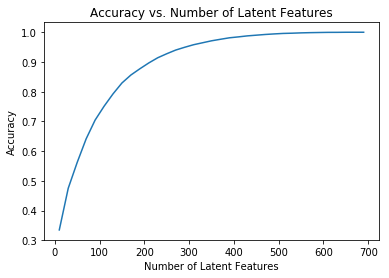

In [133]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

In [134]:
user_item_est.shape[0]

5149

In [135]:
user_item_matrix.shape[0]

5149

In [136]:
user_item_est.shape[1]

714

In [137]:
user_item_matrix.shape[1]

714

`4.` From the above, we can't really be sure how many features to use, because simply having a better way to predict the 1's and 0's of the matrix doesn't exactly give us an indication of if we are able to make good recommendations.  Instead, we might split our dataset into a training and test set of data, as shown in the cell below.  

Use the code from question 3 to understand the impact on accuracy of the training and test sets of data with different numbers of latent features. Using the split below: 

* How many users can we make predictions for in the test set?  
* How many users are we not able to make predictions for because of the cold start problem?
* How many articles can we make predictions for in the test set?  
* How many articles are we not able to make predictions for because of the cold start problem?

In [138]:
df_train = df.head(40000)
df_test = df.tail(5993)

In [139]:
df_train.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [140]:
user_item_train = create_user_item_matrix(df_train)
user_item_train.head()

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
user_item_test = create_user_item_matrix(df_test)
user_item_test.head()

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1432.0,1433.0,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1443.0
user_id,,,,,,,,,,,,,,,,,,,,,
2917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3024,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
test_article_ids = user_item_test.columns.tolist()
test_article_ids = [str(x) for x in test_article_ids]
test_article_ids

['0.0',
 '2.0',
 '4.0',
 '8.0',
 '9.0',
 '12.0',
 '14.0',
 '15.0',
 '16.0',
 '18.0',
 '20.0',
 '25.0',
 '26.0',
 '28.0',
 '29.0',
 '30.0',
 '32.0',
 '33.0',
 '34.0',
 '36.0',
 '39.0',
 '40.0',
 '43.0',
 '48.0',
 '50.0',
 '51.0',
 '53.0',
 '54.0',
 '57.0',
 '58.0',
 '59.0',
 '60.0',
 '62.0',
 '64.0',
 '65.0',
 '68.0',
 '74.0',
 '76.0',
 '77.0',
 '78.0',
 '80.0',
 '81.0',
 '82.0',
 '87.0',
 '89.0',
 '92.0',
 '96.0',
 '98.0',
 '100.0',
 '101.0',
 '102.0',
 '103.0',
 '107.0',
 '108.0',
 '109.0',
 '110.0',
 '111.0',
 '112.0',
 '113.0',
 '115.0',
 '116.0',
 '117.0',
 '120.0',
 '122.0',
 '124.0',
 '125.0',
 '130.0',
 '131.0',
 '132.0',
 '134.0',
 '136.0',
 '138.0',
 '142.0',
 '143.0',
 '145.0',
 '146.0',
 '151.0',
 '152.0',
 '153.0',
 '157.0',
 '158.0',
 '162.0',
 '164.0',
 '173.0',
 '176.0',
 '181.0',
 '183.0',
 '184.0',
 '188.0',
 '189.0',
 '191.0',
 '193.0',
 '194.0',
 '195.0',
 '202.0',
 '205.0',
 '210.0',
 '213.0',
 '215.0',
 '221.0',
 '223.0',
 '224.0',
 '225.0',
 '230.0',
 '232.0',
 '2

In [155]:
test_user_ids = user_item_test.index.tolist()
test_user_ids[:5]

[2917, 3024, 3093, 3193, 3527]

In [144]:
df_train = df.head(40000)
df_test = df.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    # Your code here
    user_item_train = create_user_item_matrix(df_train)
    user_item_test = create_user_item_matrix(df_test)
    test_idx = user_item_test.index.tolist()
    
    test_arts = user_item_test.columns.tolist()
    test_arts = [str(x) for x in test_arts]
    
    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

In [145]:
user_item_train.shape[0]

4487

In [146]:
user_item_train.shape[1]

714

In [147]:
user_item_test.head()

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1432.0,1433.0,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1443.0
user_id,,,,,,,,,,,,,,,,,,,,,
2917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3024,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
len(test_idx)

682

In [149]:
user_item_test.shape[0]

682

In [150]:
len(test_arts)

574

In [151]:
user_item_test.shape[1]

574

In [152]:
len(test_arts) - user_item_test.shape[1]

0

In [153]:
# Replace the values in the dictionary below
a = 662 
b = 574 
c = 20 
d = 0 


sol_4_dict = {
    'How many users can we make predictions for in the test set?': c,
    'How many users in the test set are we not able to make predictions for because of the cold start problem?': a,
    'How many movies can we make predictions for in the test set?': b,
    'How many movies in the test set are we not able to make predictions for because of the cold start problem?': d,
}

t.sol_4_test(sol_4_dict)

Awesome job!  That's right!  All of the test movies are in the training data, but there are only 20 test users that were also in the training set.  All of the other users that are in the test set we have no data on.  Therefore, we cannot make predictions for these users using SVD.


`5.` Now use the **user_item_train** dataset from above to find U, S, and V transpose using SVD. Then find the subset of rows in the **user_item_test** dataset that you can predict using this matrix decomposition with different numbers of latent features to see how many features makes sense to keep based on the accuracy on the test data. This will require combining what was done in questions `2` - `4`.

Use the cells below to explore how well SVD works towards making predictions for recommendations on the test data.  

- **Decompose the training set user-item matrix**

In [162]:
# fit SVD on the user_item_train matrix
u_train, s_train, vt_train = np.linalg.svd(user_item_train, full_matrices=True, compute_uv=True) # fit svd similar to above then use the cells below

s_train.shape, u_train.shape, vt_train.shape

((714,), (4487, 4487), (714, 714))

- **Use this decomposition to predict values for the user-item test dataset and check the accuracy of the predictions from the train set and compared with the test set**

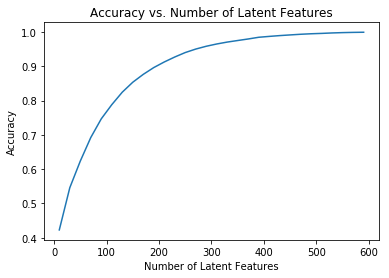

In [193]:
# Use these cells to see how well you can use the training 
# decomposition to predict on test data
num_latent_feats_2 = np.arange(10,600+10,20)
sum_errs_2 = []

for k in num_latent_feats_2:
    # restructure with k latent features
    s_new_2, u_new_2, vt_new_2 = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    
    # take dot product
    user_item_est_2 = np.around(np.dot(np.dot(u_new_2, s_new_2), vt_new_2))
    
    # compute error for each prediction to actual value
    diffs_2 = np.subtract(user_item_train, user_item_est_2)
    
    # total errors and keep track of them
    err_2 = np.sum(np.sum(np.abs(diffs_2)))
    sum_errs_2.append(err_2)
    
    
plt.plot(num_latent_feats_2, 1 - np.array(sum_errs_2)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

In [188]:
user_item_est.shape[0]

4487

In [189]:
user_item_test.shape[0]

682

In [190]:
user_item_est.shape[1]

714

In [191]:
user_item_test.shape[1]

574

`6.` Use the cell below to comment on the results you found in the previous question. Given the circumstances of your results, discuss what you might do to determine if the recommendations you make with any of the above recommendation systems are an improvement to how users currently find articles? 

**The accuracy is a good metric to use here in this case. It can provide us with a fair assessment of the model's performance when we can evaluate . But the current assessment framework is not robust enough to make conclusive results about the model as comparing the accuracy in section 3. and 5. And consider about the number of train and test users, we cannot make predictions for all users in the test set, it's not sufficient. It's understandable as we see the similarity we base on is very simple, the users are considered similar to each other just by only 1 metric that's the history of article the users interacted with.** 

**I see we can use an online evaluation technique like A/B testing here to improve. I will separate the user groups base on device types, cookies, IP addresses... that show up more information such as location, OS, device, time... And the experiment should be run for the time base at least a month, then more metrics of user similarity will be tracked during this experiment such as location, timing behavior... Those new metrics will help to improve the prediction results more conclusive.**

<a id='conclusions'></a>
### Extras
Using your workbook, you could now save your recommendations for each user, develop a class to make new predictions and update your results, and make a flask app to deploy your results.  These tasks are beyond what is required for this project.  However, from what you learned in the lessons, you certainly capable of taking these tasks on to improve upon your work here!


## Conclusion

> Congratulations!  You have reached the end of the Recommendations with IBM project! 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2322/view). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations! 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Recommendations_with_IBM.ipynb'])